### TODO 

### Redes de documentos

Démosle una vuelta de tuerca al problema y propongamos una construcción tipo redes complejas de los documentos. Para ello vamos a utilizar la librería de python especial para redes complejas llamada Networkx. Definamos la red de documentos como una red pesada, cuyo pesos vienen dados por la correlación entre documentos, descartando la creación de un link si la correlación no es estadísticamente significativa (es decir, si tiene un p-valor > 0.001 descartamos el link, sino lo conservamos con el peso dado por la correlación). Veamos el efecto de reducir la dimensión del problema.

Comenzamos importando la librería:


In [1]:
import cPickle as pk

corpus_lsa = pk.load(file('Tutorial_corpus_LSA.pk','r'))

In [2]:
from scipy.spatial.distance import cosine

N = 400
weights = [(1.00 - cosine(corpus_lsa[i], corpus_lsa[j])) for i in range(N) for j in range(i+1,N)]

/home/sebastian/Environments/Texts/local/lib/python2.7/site-packages/scipy/sparse/lil.py:19: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _csparsetools
/home/sebastian/Environments/Texts/local/lib/python2.7/site-packages/scipy/sparse/csgraph/__init__.py:165: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._shortest_path import shortest_path, floyd_warshall, dijkstra,\
/home/sebastian/Environments/Texts/local/lib/python2.7/site-packages/scipy/sparse/csgraph/_validation.py:5: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._tools import csgraph_to_dense, csgraph_from_dense,\
/home/sebastian/Environments/Texts/local/lib/python2.7/site-packages/scipy/sparse/csgraph/__init__.py:167: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._traversal import 

In [3]:
import matplotlib.pyplot as plt
import numpy as np

/home/sebastian/Environments/Texts/local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


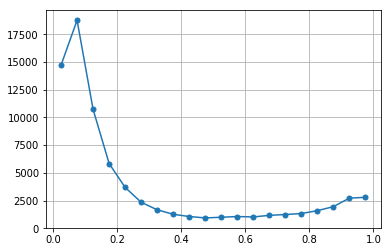

In [4]:
counts, edges = np.histogram(weights, bins = 20, range = [0, 1.00])

middle_edge = [(edges[i] + edges[i+1])*0.5 for i in range(len(counts))]

plt.plot(middle_edge, counts, '.-', markersize = 10)
plt.grid('on')
plt.show()

In [13]:
import igraph


graph = igraph.Graph()

graph.add_vertices(N)

for i in range(N):
    for j in range(i+1, N):
        if (1.00 - cosine(corpus_lsa[i], corpus_lsa[j])) > 0.70:
            graph.add_edge(source=i, target=j)


In [24]:

visual_style = {}
visual_style["vertex_size"] = 5
visual_style["vertex_color"] = 32
visual_style["edge_color"] = 'grey'

igraph.plot(graph, **visual_style)

In [16]:
comm = graph.community_infomap()

In [27]:
set(comm.membership)


Help on built-in function arange in module numpy.core.multiarray:

arange(...)
    arange([start,] stop[, step,], dtype=None)
    
    Return evenly spaced values within a given interval.
    
    Values are generated within the half-open interval ``[start, stop)``
    (in other words, the interval including `start` but excluding `stop`).
    For integer arguments the function is equivalent to the Python built-in
    `range <http://docs.python.org/lib/built-in-funcs.html>`_ function,
    but returns an ndarray rather than a list.
    
    When using a non-integer step, such as 0.1, the results will often not
    be consistent.  It is better to use ``linspace`` for these cases.
    
    Parameters
    ----------
    start : number, optional
        Start of interval.  The interval includes this value.  The default
        start value is 0.
    stop : number
        End of interval.  The interval does not include this value, except
        in some cases where `step` is not an integer and

In [36]:
a = list(set(comm.membership))

len(a)


11

In [40]:
b = np.linspace(0, 256, 11)

In [46]:
color_dict = dict([[a[i], int(b[i])] for i in range(len(a))])

In [47]:
color_dict

{0: 0,
 1: 25,
 2: 51,
 3: 76,
 4: 102,
 5: 128,
 6: 153,
 7: 179,
 8: 204,
 9: 230,
 10: 256}

In [48]:

visual_style = {}
visual_style["vertex_size"] = 5
visual_style["vertex_color"] = [color_dict[comm.membership[i]] for i in range(N)]
visual_style["edge_color"] = 'grey'

igraph.plot(graph, **visual_style)

IndexError: color index too large